In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from statsmodels.tsa.ar_model import AR,ARResults

In [3]:
df=pd.read_csv('uspopulation.csv',index_col='DATE',parse_dates=True)

In [4]:
df.index.freq='MS'

In [5]:
df

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699
...,...
2018-08-01,327698
2018-09-01,327893
2018-10-01,328077


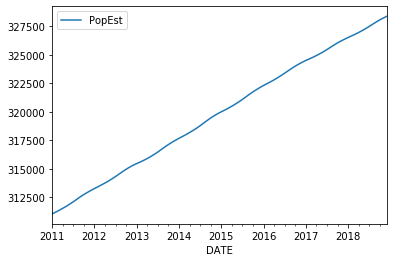

In [6]:
df.plot()

In [7]:
train=df.iloc[:84]
test=df.iloc[84:]

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
model=AR(train['PopEst'])

In [11]:
Ar1fit=model.fit(maxlag=1)

In [12]:
Ar1fit.aic

6.410771237031995

In [13]:
Ar1fit.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [14]:
start=len(train)

In [15]:
start

84

In [16]:
end=len(train)+len(test)-1

In [17]:
end

95

In [19]:
modelo=Ar1fit.predict(start=start,end=end)

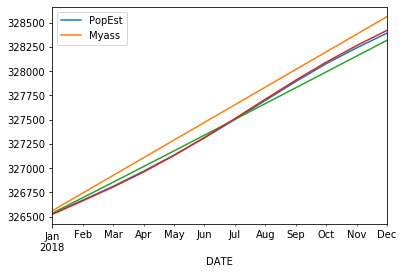

In [49]:
test.plot()
modelo.plot()
model1.plot()
defd.plot(legend=True)

In [23]:
Ar2fit=AR(train['PopEst'])

In [24]:
model0=Ar2fit.fit(maxlag=2)

In [25]:
model0.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [27]:
model1=model0.predict(start=start,end=end)

In [40]:
modelp=AR(train['PopEst'])

In [41]:
ret=modelp.fit(ic='t-stat')

In [42]:
ret.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [43]:
defd=ret.predict(start=start,end=end)

In [48]:
defd.rename('Myass',inplace=True)

2018-01-01    326523.865561
2018-02-01    326662.772578
2018-03-01    326805.746889
2018-04-01    326960.064232
2018-05-01    327130.572948
2018-06-01    327315.962796
2018-07-01    327511.010113
2018-08-01    327710.938373
2018-09-01    327907.425554
2018-10-01    328092.870786
2018-11-01    328264.133683
2018-12-01    328421.667238
Freq: MS, Name: Myass, dtype: float64

In [50]:
from sklearn.metrics import mean_squared_error

In [59]:
list=[defd,model1,modelo]

In [60]:
for i in list:
    print(mean_squared_error(test,i))

186.97263605698208
2713.258683668394
17449.714237833407


In [62]:
frg=AR(df['PopEst'])

In [64]:
fr=frg.fit()

In [66]:
gu=fr.predict(start=len(df),end=len(df)+12)

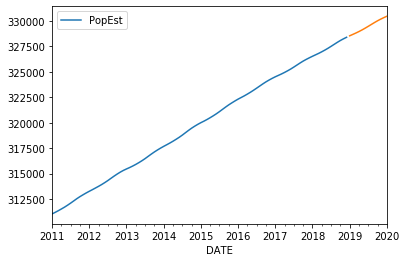

In [68]:
df.plot()
gu.plot()